In [32]:
%matplotlib inline

In [40]:
import pandas as pd
import numpy as np
from os import path
import json
from ast import literal_eval
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("bmh")
matplotlib.rcParams['figure.figsize'] = (20.0, 7.0)

In [35]:
data_dir = "data"

train = pd.read_csv(path.join(data_dir, "train_input.csv"), sep=';', index_col=0)
ages = pd.read_csv(path.join(data_dir, "train_output.csv"), sep=';', index_col=0)

In [5]:
train.columns

Index(['DEVICE', 'EEG_0', 'EEG_1', 'EEG_2', 'EEG_3', 'EEG_4', 'EEG_5', 'EEG_6',
       'EEG_7', 'EEG_8',
       ...
       'EEG_74991', 'EEG_74992', 'EEG_74993', 'EEG_74994', 'EEG_74995',
       'EEG_74996', 'EEG_74997', 'EEG_74998', 'EEG_74999', 'HYPNOGRAM'],
      dtype='object', length=75002)

In [5]:
rand_ID = 56
subject = train.loc[rand_ID, :]

In [6]:
hypnogram = pd.Series(literal_eval(subject["HYPNOGRAM"])).astype(np.int8)

In [7]:
hypnogram = hypnogram.replace(-1, np.nan)

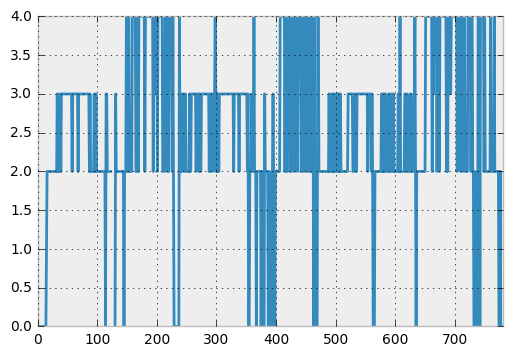

In [8]:
hypnogram.plot()

In [10]:
hypnogram.value_counts(dropna=False)

 2.0    322
 3.0    211
 4.0    179
 0.0     60
NaN       8
 1.0      1
dtype: int64

In [11]:
eeg = pd.DataFrame(subject.iloc[1:-1]).astype(np.float64)
eeg.columns = ["EEG"]

In [12]:
freq = 250
mult = 1. / freq
eeg['bin'] = np.floor(np.arange(75000) * mult + .5)
appr_eeg = eeg.groupby("bin").mean()

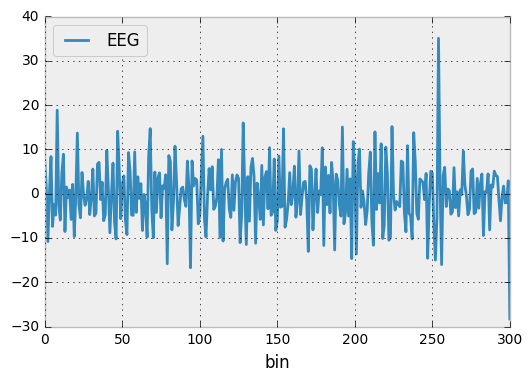

In [13]:
appr_eeg.plot()

In [9]:
rand_ID = 23
subject2 = train.loc[rand_ID, :]

In [10]:
hypnogram2 = pd.Series(literal_eval(subject2["HYPNOGRAM"])).astype(np.int8)
hypnogram2 = hypnogram2.replace(-1, np.nan)

In [17]:
print(hypnogram2.shape[0] * 30 / 3600)
print(hypnogram.shape[0] * 30 / 3600)

8.258333333333333
6.508333333333334


In [26]:
hypnogram2bis = hypnogram2.iloc[1:].reset_index(drop=True)

In [27]:
test = hypnogram2.fillna(hypnogram2bis)

In [29]:
test.value_counts(dropna=False)

2.0    496
3.0    228
4.0    189
0.0     70
1.0      8
dtype: int64

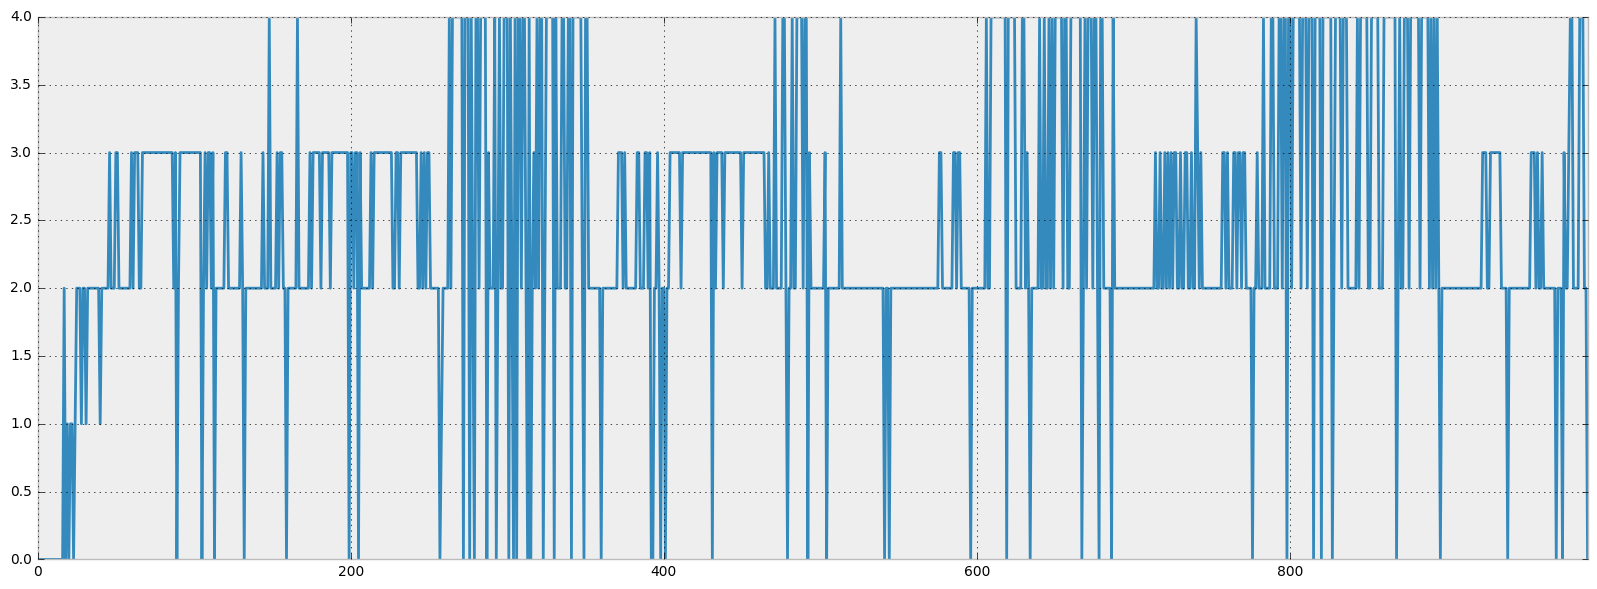

In [41]:
test.plot()